# Creation of an EPR pair using two qubits


    
Let us start with a simple circuit: the creation of an EPR pair using two qubits.
    
    
First, we need to import relevant objects from the python AQASM module:

In [1]:
from qat.lang.AQASM import Program, H, CNOT 

## Creation of the quantum program

Then, we can declare a new object ``Program``. Let us give it an explicit name:

In [2]:
epr_prog = Program() 

To create our EPR pair, we need to manipulate two qbits. 
Qbits are manipulated through qbit registers only (to keep things structured).
Registers are allocated as follows:

In [3]:
qbits = epr_prog.qalloc(2) 

Now, we can access our qbits using the register "qbits".

Registers behave like python list/arrays.

Here our qbits will be refered to using qbits[0] and qbits[1].

To create our EPR pair, we simply implement the appropriate 2-qbit rotation using a Hadamard gate (H) on the first qbit, followed by a controlled NOT gate (CNOT) on both qbits:

In [4]:
epr_prog.apply(H, qbits[0]) 
epr_prog.apply(CNOT, qbits)

Notice that since the CNOT is applied on both qbits (it is a 2-qbit gate), we can pass the whole register as argument to the ``.apply`` method.

The corresponding circuit object can be extracted directly from the Program object as follows:

[Op(gate='H', qbits=[0], type=0, cbits=None, formula=None, remap=None), Op(gate='CNOT', qbits=[0, 1], type=0, cbits=None, formula=None, remap=None)]


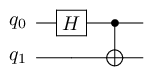

In [5]:
circuit = epr_prog.to_circ()
print(circuit.ops)
%qatdisplay circuit

## Simulation of the execution of the circuit
Now that we have a proper circuit, we can try and simulate it:

In [6]:
#Let us import some qpu connected to a classical linear algebra simulator
from qat.qpus import LinAlg
qpu = LinAlg()

job = circuit.to_job()

result = qpu.submit(job)
for sample in result:
    print("State", sample.state, "with amplitude", sample.amplitude)

State |00> with amplitude (0.7071067811865475+0j)
State |11> with amplitude (0.7071067811865475+0j)


## Export to Atos Quantum Assembly Language (AQASM) format
We can also export our circuit in the AQASM format:

In [7]:
epr_prog.export("helloworld.aqasm") 

The generated file *helloworld.aqasm* should look like this:

In [8]:
!cat helloworld.aqasm

BEGIN
qubits 2
cbits 2

H  q[0]
CNOT  q[0],q[1]
END


and can be compiled to circ format as follows:

In [9]:
!aqasm2circ helloworld.aqasm